In [1]:
import pandas as pd
from transformation import DataTransformation
from data_info import DataFrameInfo, Plotter

In [2]:
def load_csv(data_csv):
    '''Load the data csv as a pandas dataframe'''
    df = pd.read_csv(data_csv)
    return df

data_csv = 'data.csv'
df = load_csv(data_csv)

transformer  = DataTransformation(df)
df_info = DataFrameInfo(df)
df_plot = Plotter(df)

df.head(10)

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
5,38656111,41439917,2525,2525.0,2525.0,36 months,11.44,83.20,B,B4,...,0.0,0.0,Jan-2022,91.39,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
6,38656110,41439916,6675,6675.0,6675.0,NaN,21.99,254.89,E,E5,...,0.0,0.0,Mar-2021,6724.95,NaN,Mar-2021,0.0,NaN,1,INDIVIDUAL
7,38656067,41439872,26500,26500.0,26200.0,NaN,19.99,701.95,E,E3,...,0.0,0.0,Aug-2021,701.95,NaN,Jan-2022,0.0,43.0,1,INDIVIDUAL
8,38656063,41439868,10000,10000.0,10000.0,60 months,12.99,227.48,C,C2,...,0.0,0.0,Jan-2022,227.48,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
9,38656052,41439857,10000,NaN,10000.0,36 months,8.19,314.25,A,A5,...,0.0,0.0,Jan-2022,314.25,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

Columns that need to be changed to be in the correct format:
- term
- employment_length
- issue_date
- earliest_credit_line
- last_payment_date
- next_payment_date
- last_credit_pull_date


note - drop mths_since_last_record, mths_since_last_major_derog (to many missing values)

In [4]:
df[["term","employment_length","issue_date","earliest_credit_line","last_payment_date","next_payment_date", "last_credit_pull_date"]].head(10)

,term,employment_length,issue_date,earliest_credit_line,last_payment_date,next_payment_date,last_credit_pull_date
0,36 months,5 years,Jan-2021,Oct-1987,Jan-2022,Feb-2022,Jan-2022
1,36 months,9 years,Jan-2021,Sep-2001,Jan-2022,Feb-2022,Jan-2022
2,36 months,8 years,Jan-2021,Sep-1998,Oct-2021,NaN,Oct-2021
3,36 months,1 year,Jan-2021,Jun-2008,Jun-2021,NaN,Jun-2021
4,36 months,10+ years,Jan-2021,Apr-2002,Jan-2022,Feb-2022,Jan-2022
5,36 months,< 1 year,Jan-2021,Mar-2011,Jan-2022,Feb-2022,Jan-2022
6,NaN,NaN,Jan-2021,Nov-2006,Mar-2021,NaN,Mar-2021
7,NaN,< 1 year,Jan-2021,Mar-2001,Aug-2021,NaN,Jan-2022
8,60 months,< 1 year,Jan-2021,Nov-2005,Jan-2022,Feb-2022,Jan-2022
9,36 months,10+ years,Jan-2021,Feb-2002,Jan-2022,Feb-2022,Jan-2022


First decided to start of with converting the term to a float removing the months word at the end although I can see that there are only 2 periods (36 and 60 months) it would still be wise to make this a float in the case that we come across another period.

In [5]:
df = transformer.convert_term_float("term")

Now I will be converting the dates columns

In [6]:
# list of date columns that we are converting
dates_convert_list = [
    "issue_date",
    "earliest_credit_line",
    "last_payment_date",
    "next_payment_date",
    "last_credit_pull_date"
]

# convert each date column
for date_column in dates_convert_list:
    transformer.dates_conversion(date_column)

current_changes = df[["term", "issue_date", "earliest_credit_line","next_payment_date", "last_payment_date", "last_credit_pull_date"]].head(10)
current_changes

,term,issue_date,earliest_credit_line,next_payment_date,last_payment_date,last_credit_pull_date
0,36.0,2021-01-01,1987-10-01,2022-02-01,2022-01-01,2022-01-01
1,36.0,2021-01-01,2001-09-01,2022-02-01,2022-01-01,2022-01-01
2,36.0,2021-01-01,1998-09-01,NaT,2021-10-01,2021-10-01
3,36.0,2021-01-01,2008-06-01,NaT,2021-06-01,2021-06-01
4,36.0,2021-01-01,2002-04-01,2022-02-01,2022-01-01,2022-01-01
5,36.0,2021-01-01,2011-03-01,2022-02-01,2022-01-01,2022-01-01
6,NaN,2021-01-01,2006-11-01,NaT,2021-03-01,2021-03-01
7,NaN,2021-01-01,2001-03-01,NaT,2021-08-01,2022-01-01
8,60.0,2021-01-01,2005-11-01,2022-02-01,2022-01-01,2022-01-01
9,36.0,2021-01-01,2002-02-01,2022-02-01,2022-01-01,2022-01-01


Converting to categories

In [7]:
cat_to_list = [
    'grade', 
    'sub_grade', 
    'home_ownership',
    'verification_status', 
    'loan_status', 
    'purpose'
]


# convert each date column
for cat in cat_to_list:
    transformer.convert_categorical(cat)

converted_categories = df[['grade', 'sub_grade', 'home_ownership',
                              'verification_status', 'loan_status', 'purpose']]
converted_categories

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose
0,A,A4,MORTGAGE,Not Verified,Current,credit_card
1,A,A3,RENT,Not Verified,Current,credit_card
2,A,A4,MORTGAGE,Source Verified,Fully Paid,credit_card
3,C,C4,RENT,Source Verified,Fully Paid,debt_consolidation
4,A,A1,MORTGAGE,Verified,Current,debt_consolidation
...,...,...,...,...,...,...
54226,B,B2,MORTGAGE,Not Verified,Fully Paid,other
54227,C,C2,RENT,Not Verified,Fully Paid,other
54228,A,A2,MORTGAGE,Not Verified,Does not meet the credit policy. Status:Fully ...,debt_consolidation
54229,A,A2,RENT,Not Verified,Fully Paid,house


Changing categorical columns to numerical

For alot of these it makes sense because they have 1 or few values.
Initally I tried to convert the employment_length column to categories but this could not work as the 'categorical categories must be unique' so instead I have opted to convert to numerical.

In [8]:
cat_to_numerical_list = [
    "employment_length", 
    "payment_plan",
    "application_type",
    "policy_code"
]

for cat in cat_to_numerical_list:
    transformer.convert_cat_to_numerical(cat)

changed_to_numerical = df[["employment_length", "payment_plan", "application_type", "policy_code"]]
changed_to_numerical

,employment_length,payment_plan,application_type,policy_code
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1
...,...,...,...,...
54226,4,1,1,1
54227,6,1,1,1
54228,5,1,1,1
54229,9,1,1,1


Looking for missing values

<Axes: >

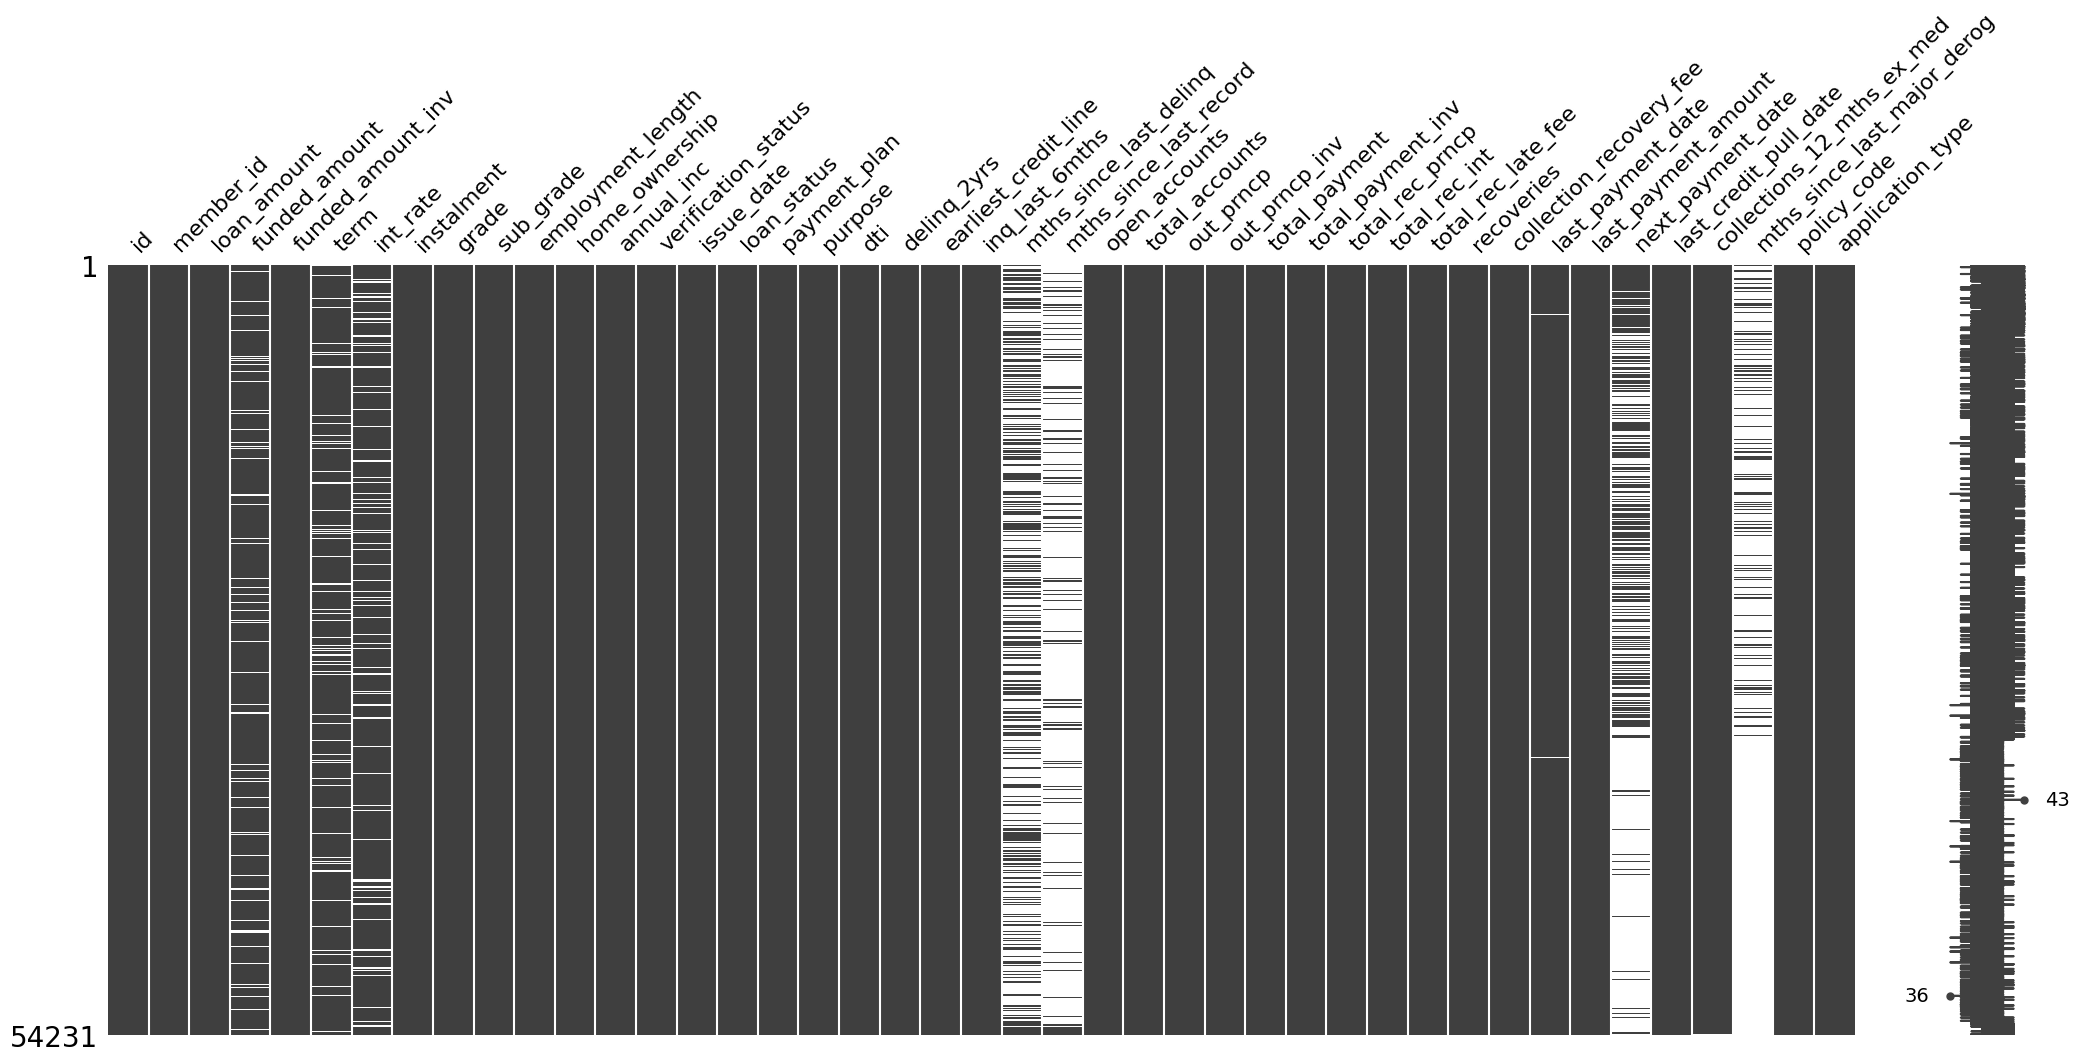

In [9]:
import missingno as msno

# Creates a matrix visualization of missing values in a DataFrame 
msno.matrix(df)

<Axes: >

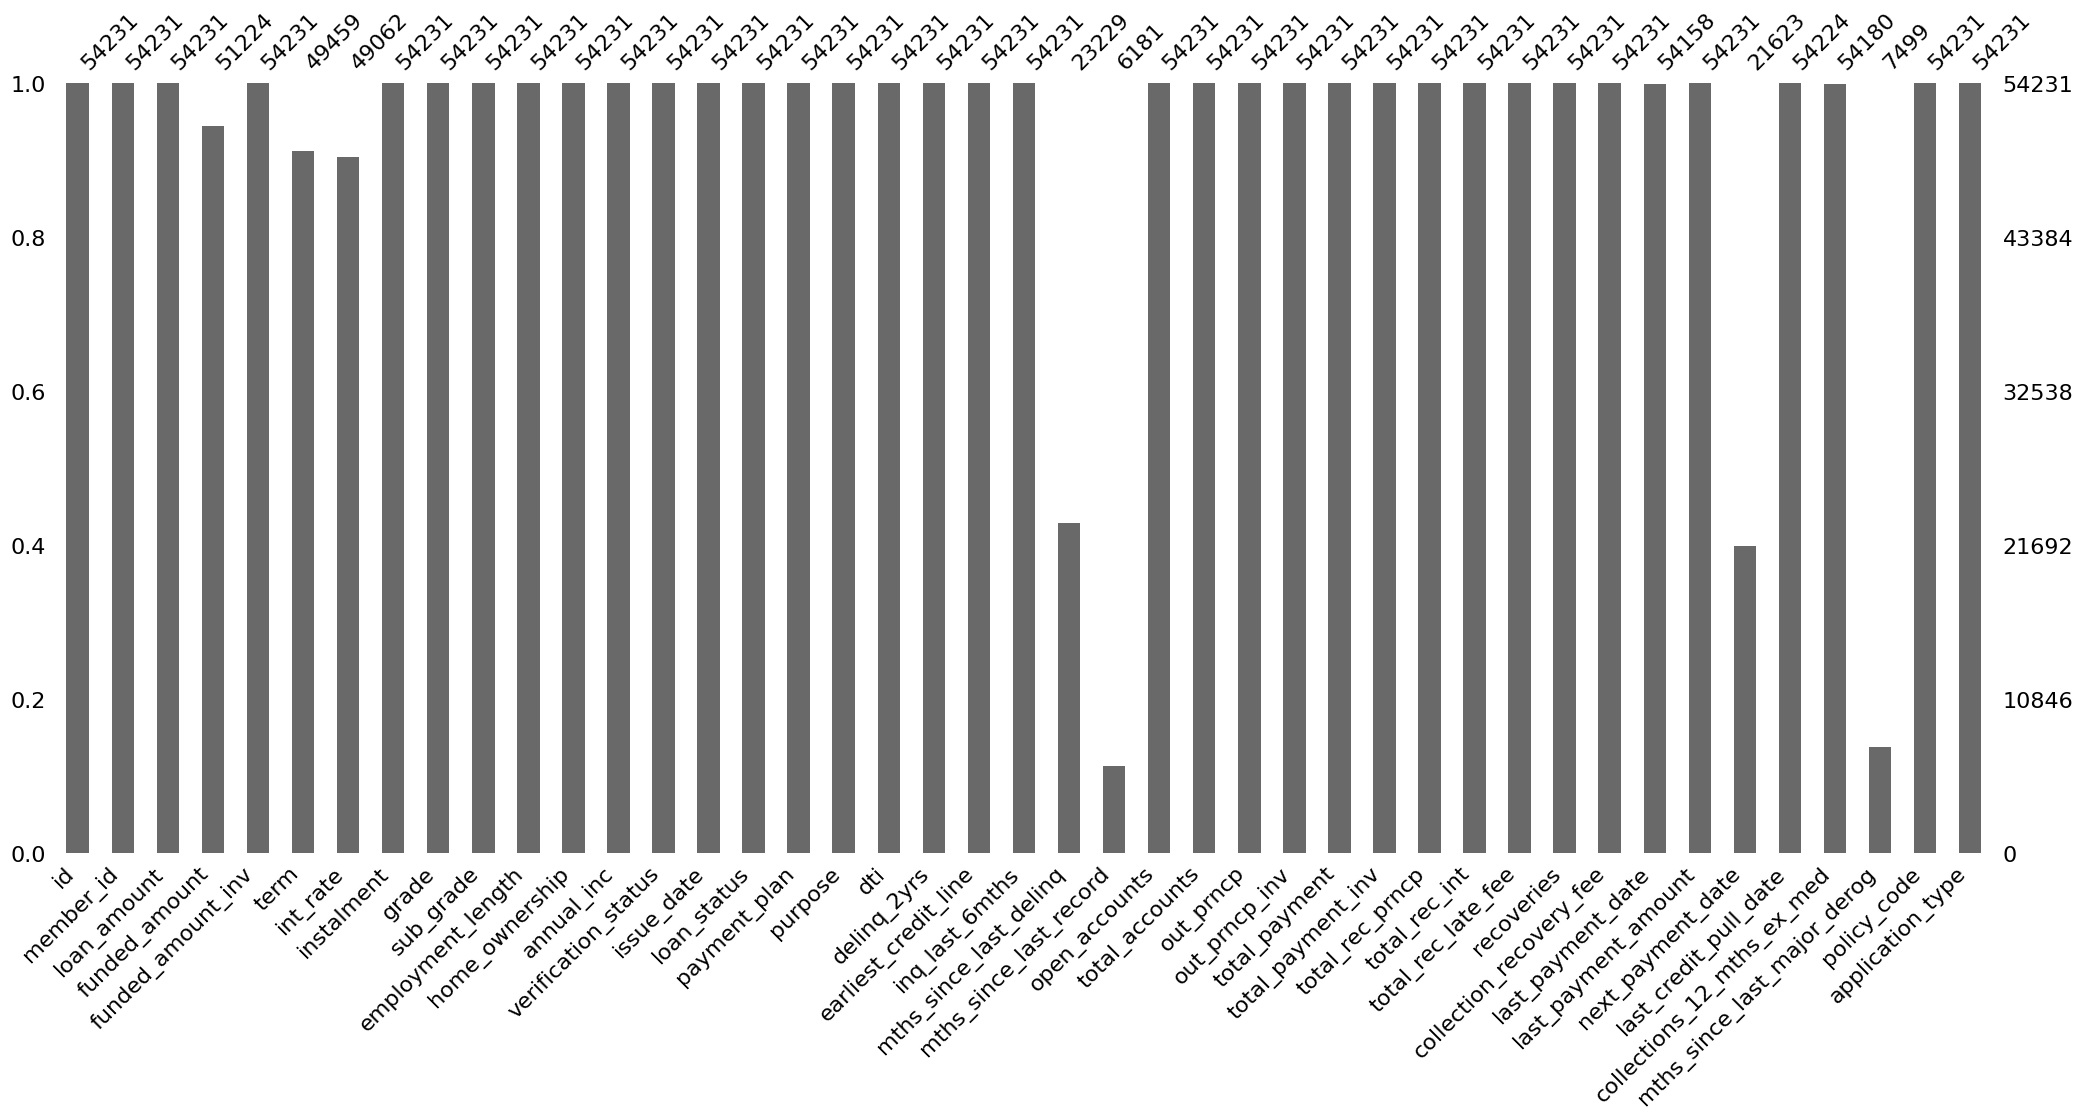

In [10]:
msno.bar(df)

In [11]:
# The percentage of missing values/ null
df_info.get_missing_values()

,column_name,percent_missing
funded_amount,funded_amount,5.54
term,term,8.80
int_rate,int_rate,9.53
mths_since_last_delinq,mths_since_last_delinq,57.17
mths_since_last_record,mths_since_last_record,88.60
last_payment_date,last_payment_date,0.13
next_payment_date,next_payment_date,60.13
last_credit_pull_date,last_credit_pull_date,0.01
collections_12_mths_ex_med,collections_12_mths_ex_med,0.09
mths_since_last_major_derog,mths_since_last_major_derog,86.17


As you can see the percentage of missing values in:
- mths_since_last_delinq
- mths_since_last_record
- next_payment_date
- mths_since_last_major_derog	

are too great so it is best to drop these columns 

In [12]:
transformer.drop_column(["mths_since_last_major_derog", "next_payment_date",
                     "mths_since_last_record", "mths_since_last_delinq"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54231 non-null  int64         
 1   member_id                   54231 non-null  int64         
 2   loan_amount                 54231 non-null  int64         
 3   funded_amount               51224 non-null  float64       
 4   funded_amount_inv           54231 non-null  float64       
 5   term                        49459 non-null  float64       
 6   int_rate                    49062 non-null  float64       
 7   instalment                  54231 non-null  float64       
 8   grade                       54231 non-null  category      
 9   sub_grade                   54231 non-null  category      
 10  employment_length           54231 non-null  int64         
 11  home_ownership              54231 non-null  category  

Now in the case of these:
- Last_credit_pull_date
- collections_12_mths_ex_med
- last_payment_date

We could drop these rows, however it's a minor amount of rows affected so we can either drop these rows or impute the columns. 

Now we need to determine whether we're going to impute these columns with either the mean or median. We'll first need to determine if these columns are skewed or not. If the columns are skewed then it will be a bad idea to impute with the mean and so we can use the median.

From observation `loan_amount` and `funded_amount` columns essentially have the same values everywhere there isn't null in funded_amount. So we could either impute the funded_amount column or we could just set it to the value of the loan_amount column, for now we'll go with imputing. I would drop the datetime rows here as well since it will be too hard to determine the next payment date. This leaves us with just `term` and `int_rate`.


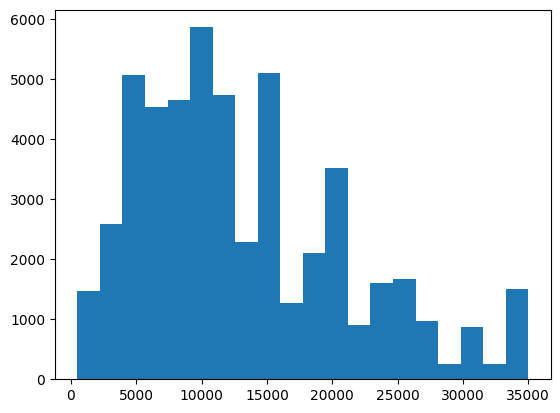

In [14]:
# histogram with 20 bins
df_plot.histogram('funded_amount', 20)

In [15]:
# Imputing funded_amount with loan_amount
df["funded_amount"] = df["funded_amount"].fillna(df["loan_amount"])

# Based on observing term and the fact that there are two prevelant choices so I will use mode (36)
# Calculate the mode of the 'term' column
term_mode = df["term"].mode().iloc[0]

# Fill missing values in the 'term' column with the mode
df["term"].fillna(term_mode, inplace=True)

# drops empty rows in these columns
df = df.dropna(subset=['last_payment_date', 'last_credit_pull_date',
       'collections_12_mths_ex_med'])

In [16]:
df_info = DataFrameInfo(df)
df_plot = Plotter(df)

In [17]:

df_info.get_missing_values()

,column_name,percent_missing
int_rate,int_rate,9.54


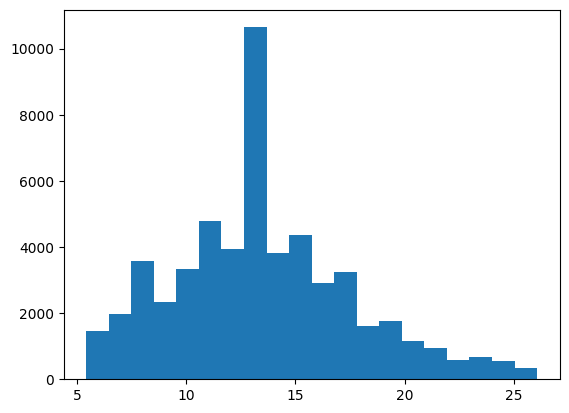

0.4326861949190135


In [24]:
df_plot = Plotter(df)
# histogram with 20 bins
df_plot.histogram('int_rate', 20)

skew_df = df['int_rate'].skew()
print(skew_df)

In [25]:
# int_rate is under threshold, So we can mean for threshold 
transformer.impute_columns('int_rate', 'median')

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,...,512.21,0.000000,0.00,0.00,2022-01-01,248.82,2022-01-01,0.0,1,1
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,...,787.94,0.000000,0.00,0.00,2022-01-01,407.52,2022-01-01,0.0,1,1
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,...,824.54,0.000000,0.00,0.00,2021-10-01,12850.16,2021-10-01,0.0,1,1
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,...,947.47,0.000000,0.00,0.00,2021-06-01,13899.67,2021-06-01,0.0,1,1
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,...,770.93,0.000000,0.00,0.00,2022-01-01,456.54,2022-01-01,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36.0,9.01,159.03,B,B2,...,724.82,0.000000,0.00,0.00,2016-07-01,160.61,2016-07-01,NaN,1,1
54227,142608,74724,5000,5000.0,2350.0,36.0,10.59,162.73,C,C2,...,826.31,104.942381,0.00,0.00,2016-10-01,490.01,2016-09-01,0.0,1,1
54228,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.000000,0.00,0.00,2016-09-01,110.58,2013-05-01,NaN,1,1
54229,88854,70699,5000,5000.0,225.0,36.0,7.43,155.38,A,A2,...,174.18,0.000000,0.00,0.00,2014-03-01,0.00,2013-05-01,NaN,1,1


In [26]:
df_info.get_missing_values()

,column_name,percent_missing
